# **Análise dos Dados de Vendas Automotivas**
##### **Feito por: Fernando Antonio e Michely Serras**


[Clique aqui para acessar a base de dados](https://drive.google.com/file/d/1Wib1W8IBw5tLoVXtV5XQ4_KqRmGxCPgl/view?usp=drive_link)
<div>
    <a href="https://drive.google.com/file/d/1Wib1W8IBw5tLoVXtV5XQ4_KqRmGxCPgl/view?usp=drive_link">
        <img src="../image/mcqueen.png" width="300px">
    </a>
</div>



### **Descrição geral da base de dados**
Base de dados com registro de pedidos realizados em uma empresa do setor automobilístico. Permite avaliar o desempenho de vendas, perfis de clientes e padrões de compras.

### **Desafios da Análise:**
- Analisar os padrões de compra por cliente ou produto.
- Relacionar categorias de produtos com volume de vendas.
- Avaliar o tempo entre pedidos e sua relação com o tamanho do negócio.
- Identificar clientes com maior potencial de retorno financeiro.

---

### ***1. Análise Inicial dos Dados***

#### **1.1 Tema e Contexto Empresarial**:
 A base apresenta dados sobre os pedidos realizados em uma empresa do setor automobilístico, em conjunto a informações que permitem avaliar o desempenho de vendas, os perfis de clientes e os padrões de compras. Dessa forma, é possível analisar e levantar hipóteses sobre fatores que influenciam os resultados comerciais da empresa.



#### **1.2 Dicionário de Dados Traduzido** 

- **orderNumber**:  Numero de identificação do pedido.
- **QuantityOrdered**:  Quantidade de itens solicitados.
- **PriceEach**:  Preço unitário de cada item.
- **OrderLineNumber**:  Número da linha dentro do pedido.
- **Sales**:  Total da venda (quantidade x preço).
- **OrderDate**:  Data do pedido.
- **Days_Since_LastOrder**:  Dias desde o ultimo pedido do cliente.
- **Status**:  Status do pedido (ex: Enviado, Em Processamento, Cancelado).
- **ProductLine**:  Categoria do produto.
- **MSRP**:  Preço sugerido pelo fabricante.
- **CustomerName**:  Nome do cliente.
- **Phone**:  Telefone de contato do Cliente.
- **Addressline1**:  Endereço do cliente.
- **City**:  Cidade do cliente.
- **Postalcode**:  Código posral do cliente.
- **Country**:  País do cliente.
- **ContactLastName**: Sobrenome do contato
- **ContactFirstName**:  Nome do Contato.
- **Dealsize**:  Tamanho do pedido (Pequeno, Médio, Grande).
<\n>

**Número de Registros: 2747**

#### **1.1.1 Obtenção dos Dados**

In [59]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy import stats

In [60]:
sns.set_theme(style="whitegrid", palette='rocket')

In [61]:
filePath = '../base/08_vendas_automotivas.csv'
df = pd.read_csv(filePath, sep=',')

if not df.empty:
    print("Os dados foram carregados corretamente.")
else:
    print("Erro ao obter dados.")


Os dados foram carregados corretamente.


In [62]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098952,6.491081,3553.047583,1757.085912,100.691664
std,91.877521,9.762135,42.042549,4.230544,1838.953901,819.280576,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,3562.000000,214.000000


<br>

#### **1.2 Quantidade de dados nulos em cada variável**


In [63]:
variaveisNulas = df.isnull().sum()
porcentagem  = (variaveisNulas / df.shape[0]) * 100

tabela_VariaveisNulas = pd.DataFrame({
    'Variáveis': df.columns,
    'Quantidade de Nulos': variaveisNulas.values,
    'Percentual (%)': porcentagem
})

# Como a tabela estava usando as variaveis como indice e repetindo eles, usamos o reset index para deixa-los numérico
tabela_VariaveisNulas = tabela_VariaveisNulas.reset_index(drop=True)

print(f" \n\t Tabela - Quantidade de Dados Nulos Por Variável \n")
tabela_VariaveisNulas

 
	 Tabela - Quantidade de Dados Nulos Por Variável 



,Variáveis,Quantidade de Nulos,Percentual (%)
0,ORDERNUMBER,0,0.0
1,QUANTITYORDERED,0,0.0
2,PRICEEACH,0,0.0
3,ORDERLINENUMBER,0,0.0
4,SALES,0,0.0
5,ORDERDATE,0,0.0
6,DAYS_SINCE_LASTORDER,0,0.0
7,STATUS,0,0.0
8,PRODUCTLINE,0,0.0
9,MSRP,0,0.0


<br>

#### **1.3 Limpeza de Dados**

#### **Critérios para Realização da Limpeza de Dados**
A partir da tabela apresentada, pudemos observar que não há valores nulos em nenhuma das varáveis presentes na base de dados.  
Portanto, decidimos que não seria necessário realizar técnicas de limpeza de dados, pois eles já se encontram completos.

In [64]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df.dtypes

C:\Users\PICHAU\AppData\Local\Temp\ipykernel_19228\1624671904.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])


ORDERNUMBER                      int64
QUANTITYORDERED                  int64
PRICEEACH                      float64
ORDERLINENUMBER                  int64
SALES                          float64
ORDERDATE               datetime64[ns]
DAYS_SINCE_LASTORDER             int64
STATUS                          object
PRODUCTLINE                     object
MSRP                             int64
PRODUCTCODE                     object
CUSTOMERNAME                    object
PHONE                           object
ADDRESSLINE1                    object
CITY                            object
POSTALCODE                      object
COUNTRY                         object
CONTACTLASTNAME                 object
CONTACTFIRSTNAME                object
DEALSIZE                        object
dtype: object

---
---

### **2. Análise Estatística e Visual**

#### **O que fazer nessa etapa:** 
- Distribuição das variáveis com histogramas e boxplots
- Medidas de tendência central e dispersão
- Matriz de correlação entre variáveis numéricas

<hr height='0.5px'>
De acordo com o ANEXO I, devemos fazer a análise estatística e visual destes tópicos: 

- Analisar os padrões de compra por cliente ou produto.
- Relacionar categorias de produtos com volume de vendas.
- Avaliar o tempo entre pedidos e sua relação com o tamanho do negócio.
- Identificar clientes com maior potencial de retorno financeiro.


#### **2.1 Histogramas e Boxplots**

array([[<Axes: title={'center': 'ORDERNUMBER'}>,
        <Axes: title={'center': 'QUANTITYORDERED'}>,
        <Axes: title={'center': 'PRICEEACH'}>],
       [<Axes: title={'center': 'ORDERLINENUMBER'}>,
        <Axes: title={'center': 'SALES'}>,
        <Axes: title={'center': 'ORDERDATE'}>],
       [<Axes: title={'center': 'DAYS_SINCE_LASTORDER'}>,
        <Axes: title={'center': 'MSRP'}>, <Axes: >]], dtype=object)

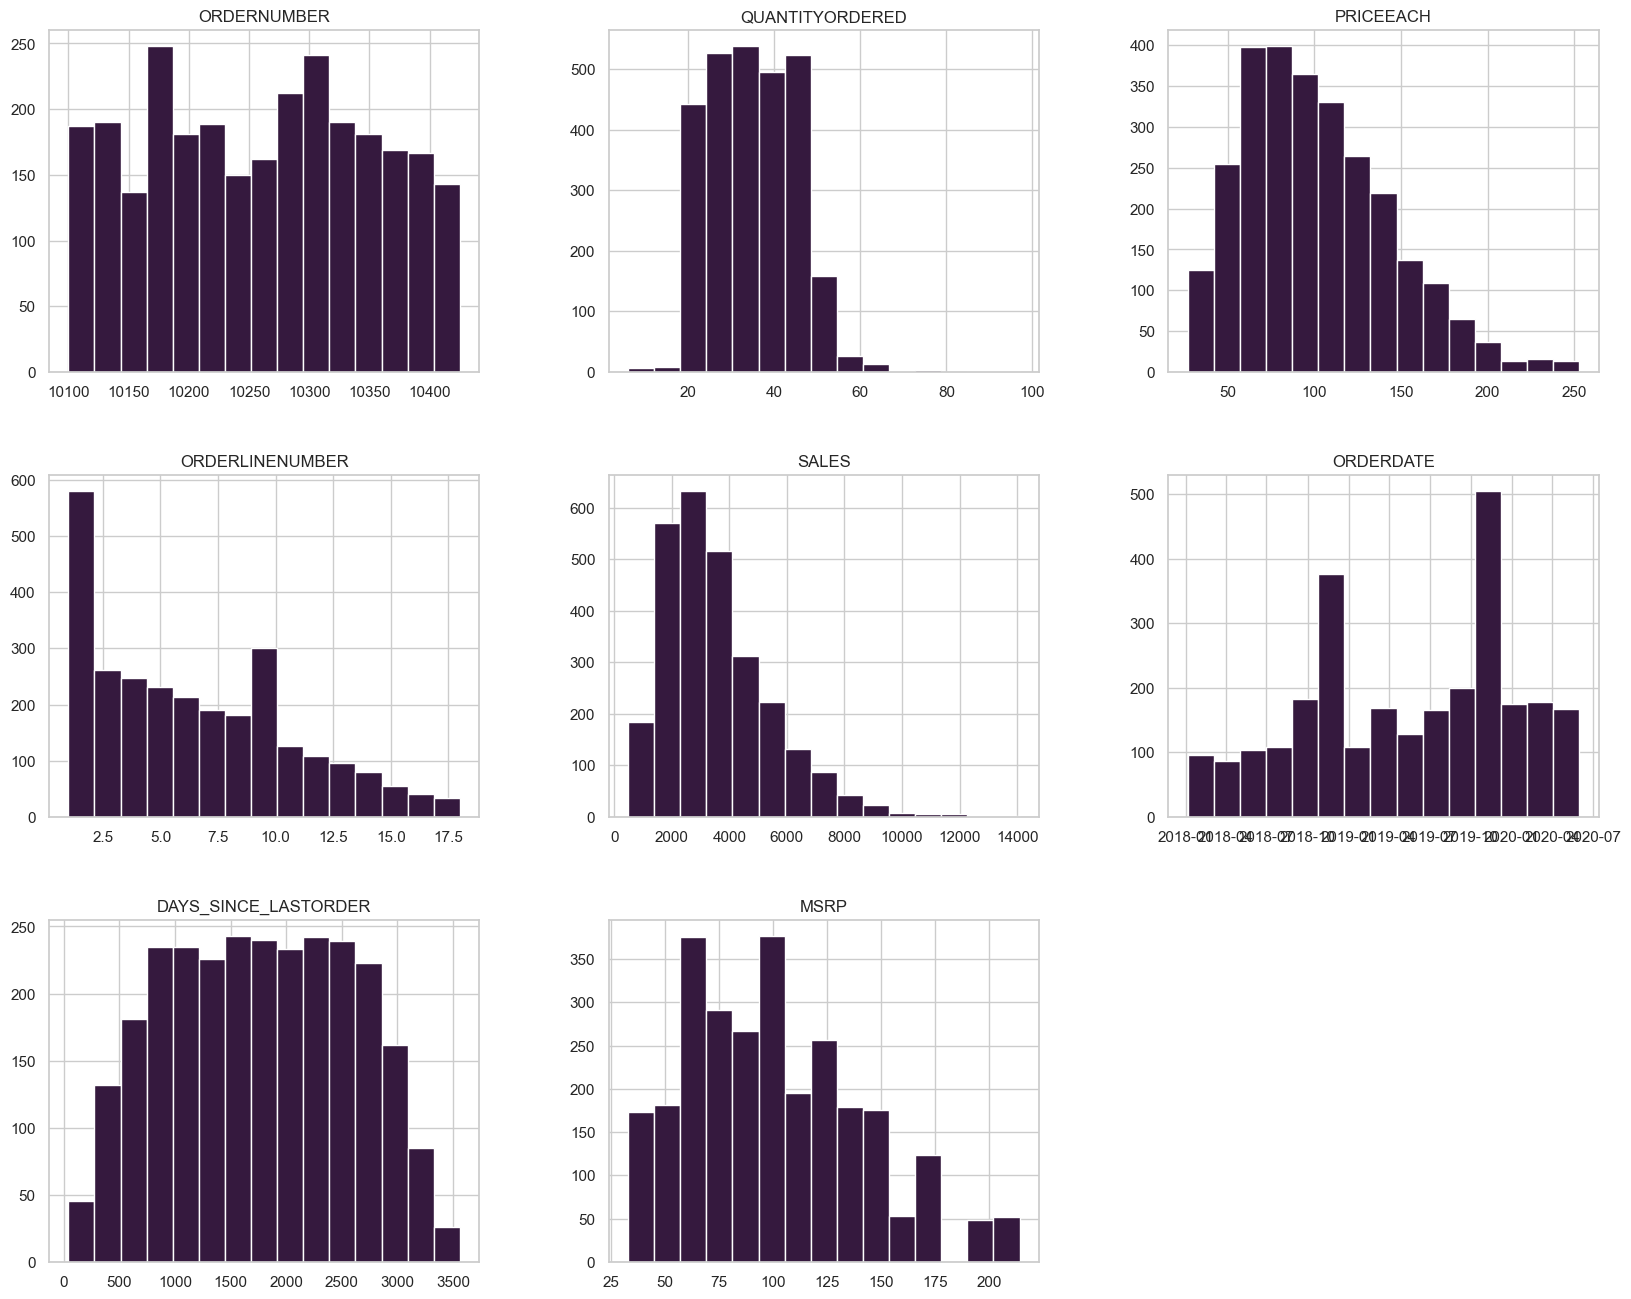

In [65]:
df.hist(bins=15, figsize=(20,16))

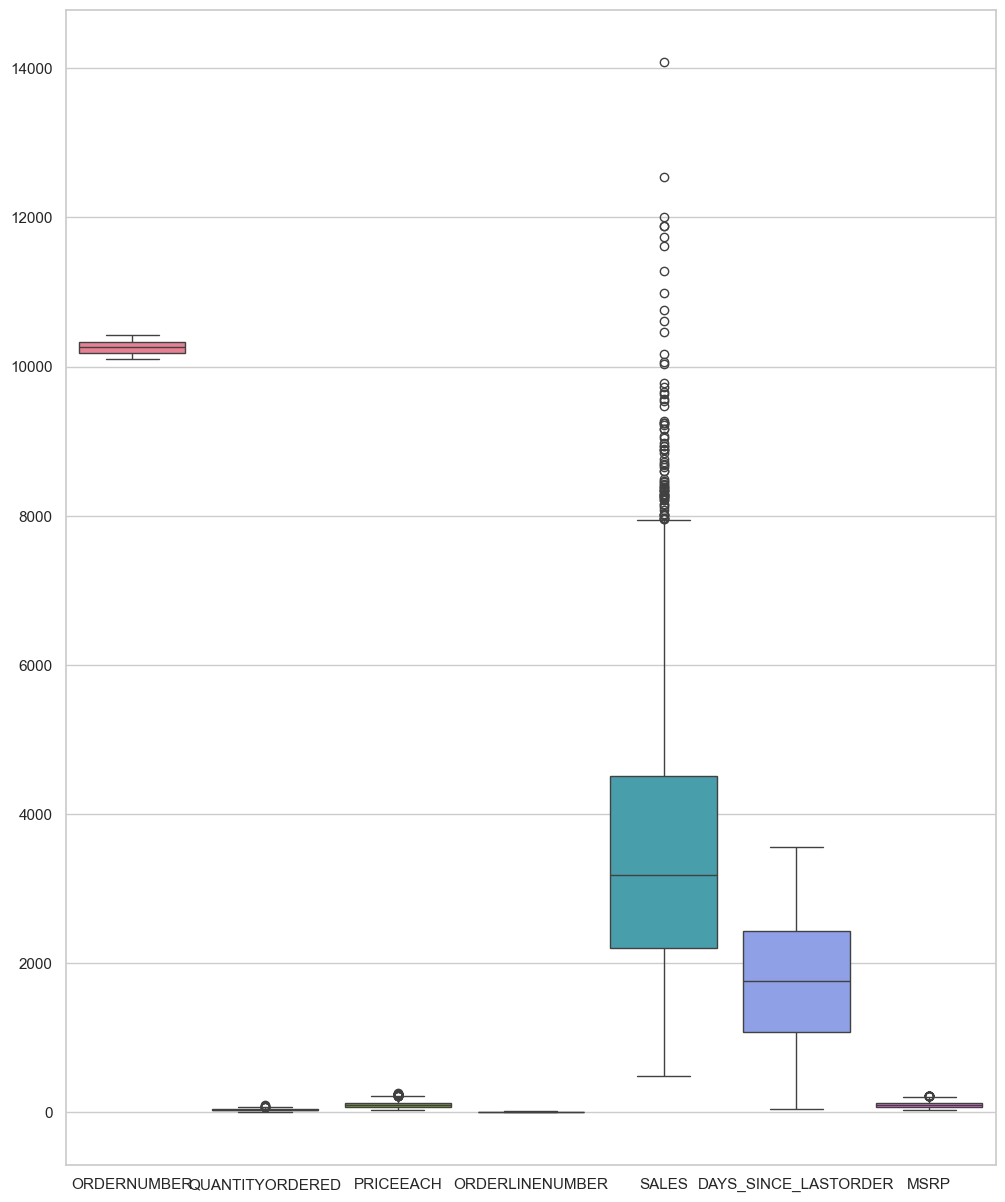

In [66]:
plt.figure(figsize=(12, 15))
sns.boxplot(data=df)
plt.show()

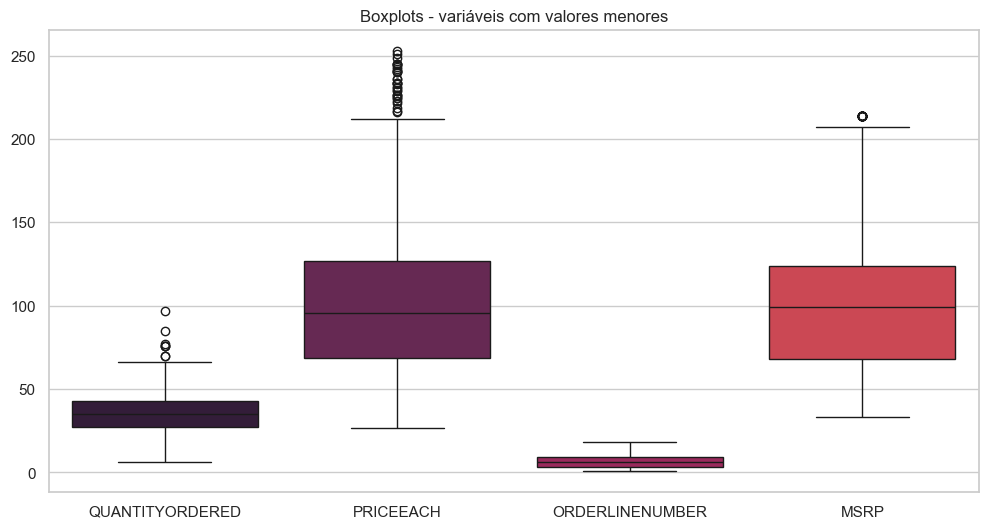

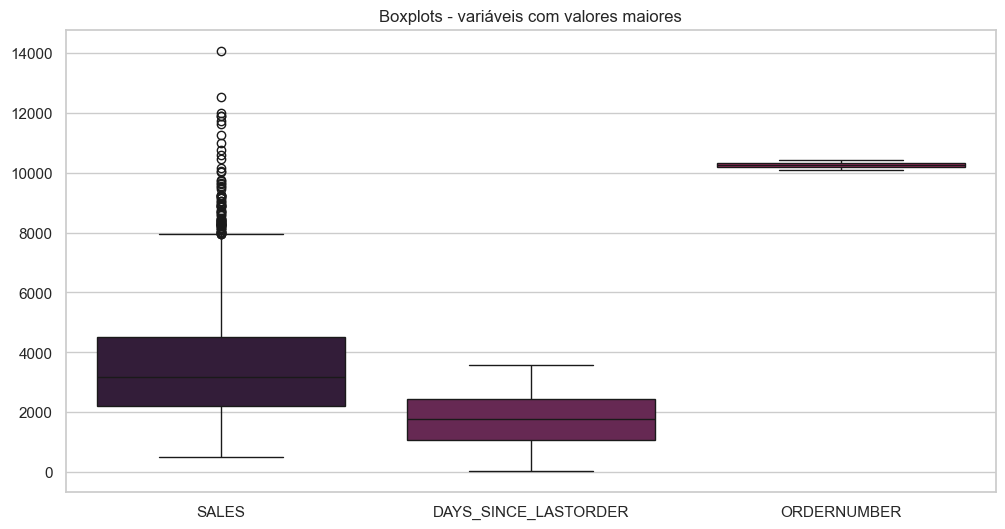

In [67]:
# Boxplots para variáveis com valores menores
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'MSRP']])
plt.title('Boxplots - variáveis com valores menores')
plt.show()

# Boxplots para variáveis com valores maiores
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['SALES', 'DAYS_SINCE_LASTORDER', 'ORDERNUMBER']])
plt.title('Boxplots - variáveis com valores maiores')
plt.show()


#### **Explicação sobre a divisão dos boxplots**
Como os dados apresentam faixas de valores muito distintas, optamos por dividi-los entre variáveis com valores elevados e variáveis com valores mais baixos. Essa separação facilita a visualização dos boxplots, permitindo uma comparação mais clara e eficiente entre as variáveis.



#### **2.2 Correlação entre as variáveis**

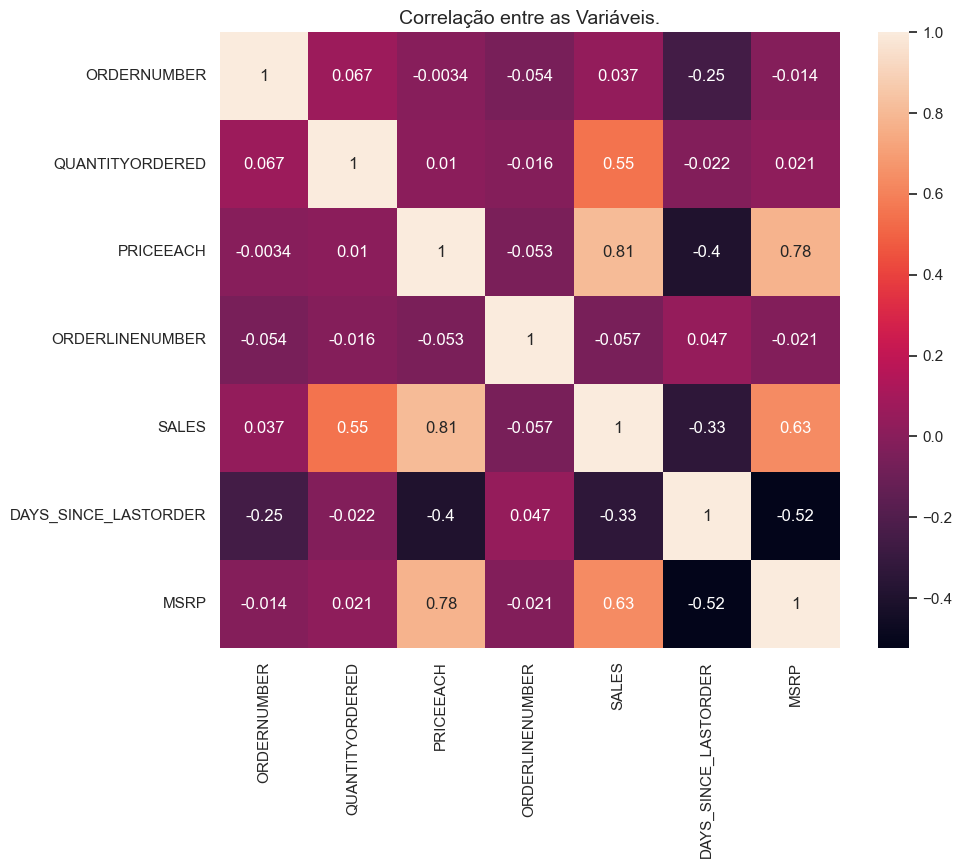

In [68]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='rocket')
plt.title('Correlação entre as Variáveis.', loc='center', fontsize=14)
plt.show()

<hr>

### **3. Formulação de Hipóteses**
#### **3.1 Hipóteses**

In [69]:
alpha = 0.05


> **- Clientes que fazem pedidos com mais frequência também compram produtos de maior valor?**

> **- Os produtos da categoria 'Classic Cars' representam a maior parte do volume de vendas?**
 

##### **Análise Descritiva das vendas por categoria:**
  - **H0** -> "A categoria classic cars é responsável pelo maior volume de vendas.
  - **H1** -> "A categoria classic cars não é responsável pelo maior volume de vendas.

In [ ]:
vendasPorCategoria = df.groupby("PRODUCTLINE")['SALES'].sum().sort_values(ascending=False)

vendasDf = vendasPorCategoria.reset_index()
total_vendas = vendasPorCategoria.sum()

vendasDf.columns = ['Categoria', 'Total de Vendas']
vendasDf['Porcentagem (%)'] = (vendasDf['Total de Vendas'] / total_vendas * 100).round(2)

print("Análise descritiva das vendas por categoria: ")
vendasDf

Análise descritiva das vendas por categoria: 


,Categoria,Total de Vendas,Porcentagem (%)
0,Classic Cars,3842868.54,39.37
1,Vintage Cars,1806675.68,18.51
2,Trucks and Buses,1111559.19,11.39
3,Motorcycles,1103512.19,11.31
4,Planes,969323.42,9.93
5,Ships,700039.22,7.17
6,Trains,226243.47,2.32


##### **Teste de normalidade dos grupos.**

In [52]:

categorias = df['PRODUCTLINE'].unique()


print("Teste de Shapiro-Wilk por categoria:")
for cat in categorias:
    grupo = df[df['PRODUCTLINE'] == cat]['SALES']
    stat, p = stats.shapiro(grupo)
    print(f"  {cat} → Estatística: {stat:.4f}, p-valor: {p:.4f}")
    if p > 0.05:
        print("  Distribuição normal (falha em rejeitar H₀)\n")
    else:
        print("  Distribuição não normal (rejeita-se H₀)\n")




Teste de Shapiro-Wilk por categoria:
  Classic Cars → Estatística: 0.9543, p-valor: 0.0000
  Distribuição não normal (rejeita-se H₀)

  Vintage Cars → Estatística: 0.8859, p-valor: 0.0000
  Distribuição não normal (rejeita-se H₀)

  Trains → Estatística: 0.8676, p-valor: 0.0000
  Distribuição não normal (rejeita-se H₀)

  Ships → Estatística: 0.9504, p-valor: 0.0000
  Distribuição não normal (rejeita-se H₀)

  Planes → Estatística: 0.8947, p-valor: 0.0000
  Distribuição não normal (rejeita-se H₀)

  Trucks and Buses → Estatística: 0.9680, p-valor: 0.0000
  Distribuição não normal (rejeita-se H₀)

  Motorcycles → Estatística: 0.9127, p-valor: 0.0000
  Distribuição não normal (rejeita-se H₀)



Teste de Kruskal-Wallis:
  Estatística da Kruskal-Wallis: 140.0512 | p-valor: 0.0000
  Há evidências estatísticas de que as vendas diferem entre as categorias (rejeita-se H₀).
  Isso apoia a hipótese de que 'Classic Cars' pode representar a maior parte do volume de vendas.



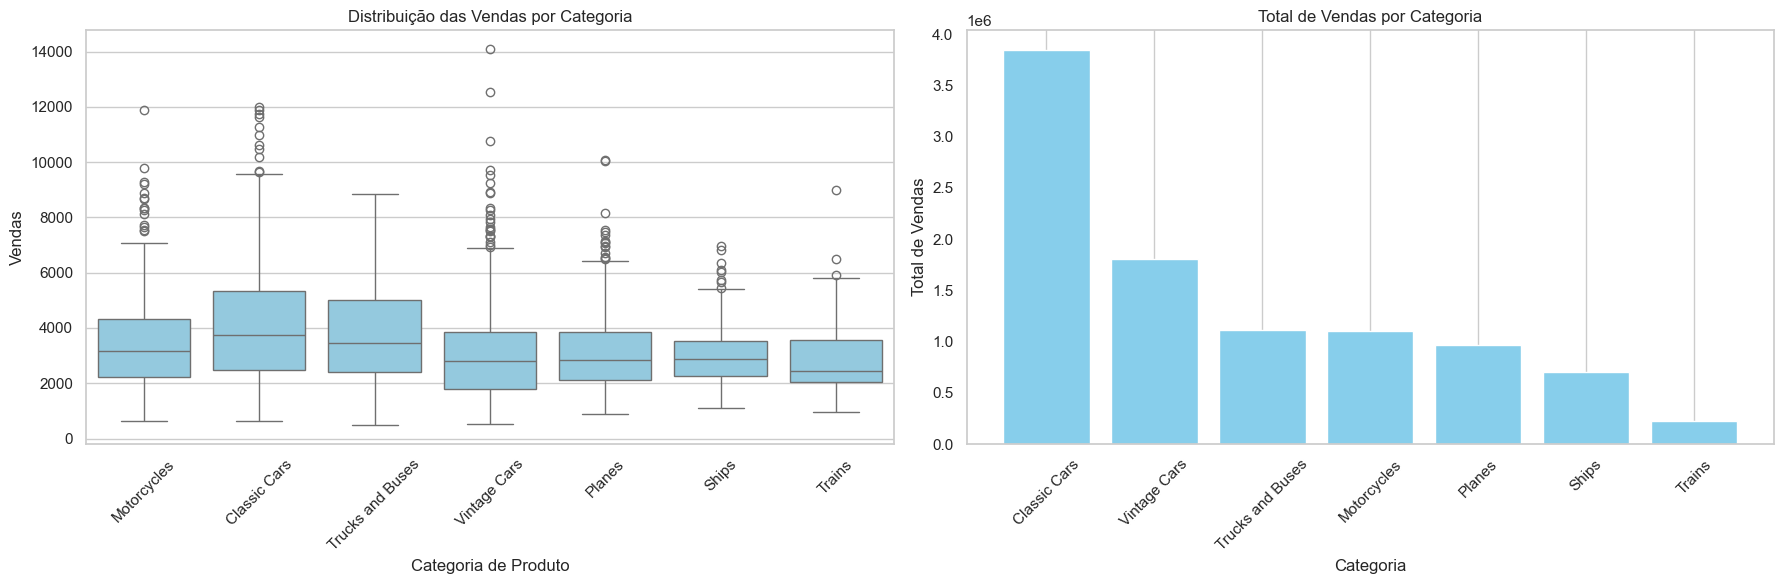

In [74]:

print("Teste de Kruskal-Wallis:")    

grupos = [df[df['PRODUCTLINE'] == cat]['SALES'] for cat in categorias]

k_stats, k_val = stats.kruskal(*grupos)
print(f'  Estatística da Kruskal-Wallis: {k_stats:.4f} | p-valor: {k_val:.4f}')

if k_val > 0.05:
    print("  Não há evidências estatísticas de diferença nas vendas entre as categorias (falha em rejeitar H₀).\n")
else:
    print("  Há evidências estatísticas de que as vendas diferem entre as categorias (rejeita-se H₀).")
    print("  Isso apoia a hipótese de que 'Classic Cars' pode representar a maior parte do volume de vendas.\n")



fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# Boxplot por categoria
sns.boxplot(data=df, x='PRODUCTLINE', y='SALES', ax=axes[0], color='skyblue')
axes[0].set_title('Distribuição das Vendas por Categoria')
axes[0].set_xlabel('Categoria de Produto')
axes[0].set_ylabel('Vendas')
axes[0].tick_params(axis='x', rotation=45)

# Barra total de vendas por categoria
axes[1].bar(vendasPorCategoria.index, vendasPorCategoria.values, color='skyblue')
axes[1].set_title('Total de Vendas por Categoria')
axes[1].set_xlabel('Categoria')
axes[1].set_ylabel('Total de Vendas')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()

##### **Conclusão sobre a hipótese 2:**
A partir da análise descritiva e dos testes estatísticos realizados, podemos **CONFIRMAR** a hipótese de que os produtos da categoria 'Classic Cars' representam a maior parte do volume de vendas.

>**- Clientes que fazem pedidos com menor intervalo de tempo entre compras tendem a gerar negócios maiores (maior valor total)?**

In [56]:

df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])


df = df.sort_values(by=['CUSTOMERNAME', 'ORDERDATE'])

df['DIAS_ENTRE_PEDIDOS'] = df.groupby('CUSTOMERNAME')['ORDERDATE'].diff().dt.days


intervalo = df.groupby('CUSTOMERNAME')['DIAS_ENTRE_PEDIDOS'].mean().reset_index()
intervalo.columns = ['CUSTOMERNAME', 'intervalo_medio']

total_vendas = df.groupby('CUSTOMERNAME')['SALES'].sum().reset_index()
total_vendas.columns = ['CUSTOMERNAME', 'vendas_totais']


analise = pd.merge(intervalo, total_vendas, on='CUSTOMERNAME')

analise['grupo_intervalo'] = pd.qcut(analise['intervalo_medio'], q=3, labels=['baixo', 'medio', 'alto'])

baixo = analise[analise['grupo_intervalo'] == 'baixo']['vendas_totais']
medio = analise[analise['grupo_intervalo'] == 'medio']['vendas_totais']
alto  = analise[analise['grupo_intervalo'] == 'alto']['vendas_totais']


for grupo in ['baixo', 'medio', 'alto']:
    dados = analise[analise['grupo_intervalo'] == grupo]
    faixa_min = dados['intervalo_medio'].min()
    faixa_max = dados['intervalo_medio'].max()
    media_vendas = dados['vendas_totais'].mean()
    mediana_vendas = dados['vendas_totais'].median()
    media_intervalo = dados['intervalo_medio'].mean()
    mediana_intervalo = dados['intervalo_medio'].median()
    print(f"\nGrupo {grupo.upper()}:")
    print(f"  Faixa de dias de intervalo médio: {faixa_min:.1f} a {faixa_max:.1f}")
    print(f"  Média de vendas totais: {media_vendas:,.2f}")
    print(f"  Mediana de vendas totais: {mediana_vendas:,.2f}")
    print(f"  Média de intervalo médio (dias): {media_intervalo:.1f}")
    print(f"  Mediana de intervalo médio (dias): {mediana_intervalo:.1f} \n")



for grupo in ['baixo', 'medio', 'alto']:
    faixa = analise[analise['grupo_intervalo'] == grupo]['intervalo_medio'].describe()[['min', 'max']]
    print(f"Grupo '{grupo}': {faixa['min']:.1f} a {faixa['max']:.1f} dias de intervalo médio")






Grupo BAIXO:
  Faixa de dias de intervalo médio: 0.0 a 12.4
  Média de vendas totais: 145,027.80
  Mediana de vendas totais: 90,803.24
  Média de intervalo médio (dias): 7.0
  Mediana de intervalo médio (dias): 6.3 


Grupo MEDIO:
  Faixa de dias de intervalo médio: 12.7 a 19.9
  Média de vendas totais: 109,359.65
  Mediana de vendas totais: 108,951.13
  Média de intervalo médio (dias): 15.9
  Mediana de intervalo médio (dias): 16.0 


Grupo ALTO:
  Faixa de dias de intervalo médio: 20.0 a 247.0
  Média de vendas totais: 74,598.59
  Mediana de vendas totais: 78,103.53
  Média de intervalo médio (dias): 39.9
  Mediana de intervalo médio (dias): 26.8 

Grupo 'baixo': 0.0 a 12.4 dias de intervalo médio
Grupo 'medio': 12.7 a 19.9 dias de intervalo médio
Grupo 'alto': 20.0 a 247.0 dias de intervalo médio


P (Levene): 0.03246
Variâncias diferentes (Rejeitar H0)

P (Anova): 0.04930
O intervalo médio afeta significativamente o total de vendas (Rejeitar H0)

P (Kruskal-Wallis): 0.00199
Há diferença significativa nas medianas (Rejeitar H0)


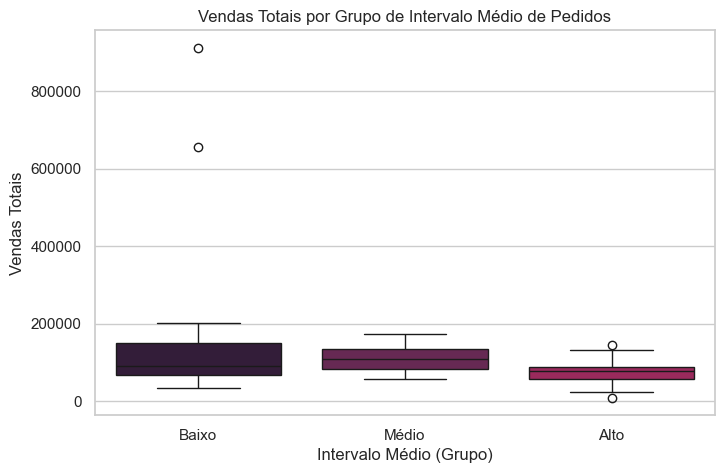

In [ ]:
### Testes Estatísticos

h_lev_stats, h_lev_p = stats.levene(baixo, medio, alto)
print(f"P (Levene): {h_lev_p:.5f}")
if h_lev_p > alpha:
    print("Variância semelhante (Falha em rejeitar H0)")
else:
    print("Variâncias diferentes (Rejeitar H0)")

#  Teste ANOVA
h_anova_stats, h_anova_p = stats.f_oneway(baixo, medio, alto)
print(f"\nP (Anova): {h_anova_p:.5f}")
if h_anova_p > alpha:
    print("O intervalo médio NÃO afeta significativamente o total de vendas (Falha em rejeitar H0)")
else:
    print("O intervalo médio afeta significativamente o total de vendas (Rejeitar H0)")

#  Teste Kruskal-Wallis =====
h_kruskal_stats, h_kruskal_p = stats.kruskal(baixo, medio, alto)
print(f"\nP (Kruskal-Wallis): {h_kruskal_p:.5f}")
if h_kruskal_p > alpha:
    print("Não há diferença significativa nas medianas (Falha em rejeitar H0)")
else:
    print("Há diferença significativa nas medianas (Rejeitar H0)")


plt.figure(figsize=(8, 5))
sns.boxplot(data=pd.DataFrame({'Baixo': baixo, 'Médio': medio, 'Alto': alto}))
plt.title("Vendas Totais por Grupo de Intervalo Médio de Pedidos")
plt.ylabel("Vendas Totais")
plt.xlabel("Intervalo Médio (Grupo)")
plt.show()

<hr><hr>

### **4. Ánalise Preditiva**

#### 4.1 Regressão Linear Simples


In [ ]:
x_simples = df["QUANTITYORDERED"].values.reshape(-1, 1)  
y = df["SALES"]
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(x_simples, y, test_size=0.2, random_state=42)

model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)
y_pred_s = model_simple.predict(X_test_s)
rmse_simple = sqrt(mean_squared_error(y_test_s, y_pred_s))

print(f"RMSE Regressão Simples (Quantidade → Vendas): {rmse_simple:.2f}")
print(f"RMSE ALTO, indicando que o modelo não está capturando bem a relação entre as variáveis: quantidade e as vendas, pressupondo que apenas a quantidade de produtos não seja suficiente para prever uma venda.")
print("Levando em consideração que o preço de cada produto também influencia nas vendas, vamos criar um modelo de regressão múltipla para tentar melhorar a previsão.")


RMSE Regressão Simples (Quantidade → Vendas): 1578.95
RMSE ALTO, indicando que o modelo não está capturando bem a relação entre as variáveis: quantidade e as vendas, pressupondo que apenas a quantidade de produtos não seja suficiente para prever uma venda.
Levando em consideração que o preço de cada produto também influencia nas vendas, vamos criar um modelo de regressão múltipla para tentar melhorar a previsão.


#### **3.2 Regressão Múltipla**

In [40]:
X_multi = df[['QUANTITYORDERED', 'PRICEEACH']]
y = df['SALES']

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)

model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)
y_pred_m = model_multi.predict(X_test_m)

rmse_multi = sqrt(mean_squared_error(y_test_m, y_pred_m))

print(f"RMSE Regressão Múltipla (Quantidade + Preço → Vendas): {rmse_multi:.2f}")
print("RMSE baixo, indicando que o modelo está capturando melhor a relação entre as variáveis: quantidade e preço, e as vendas.")





RMSE Regressão Múltipla (Quantidade + Preço → Vendas): 397.16
RMSE baixo, indicando que o modelo está capturando melhor a relação entre as variáveis: quantidade e preço, e as vendas.


R² Regressão Simples: 0.2458 
R² Regressão Múltipla: 0.9523 


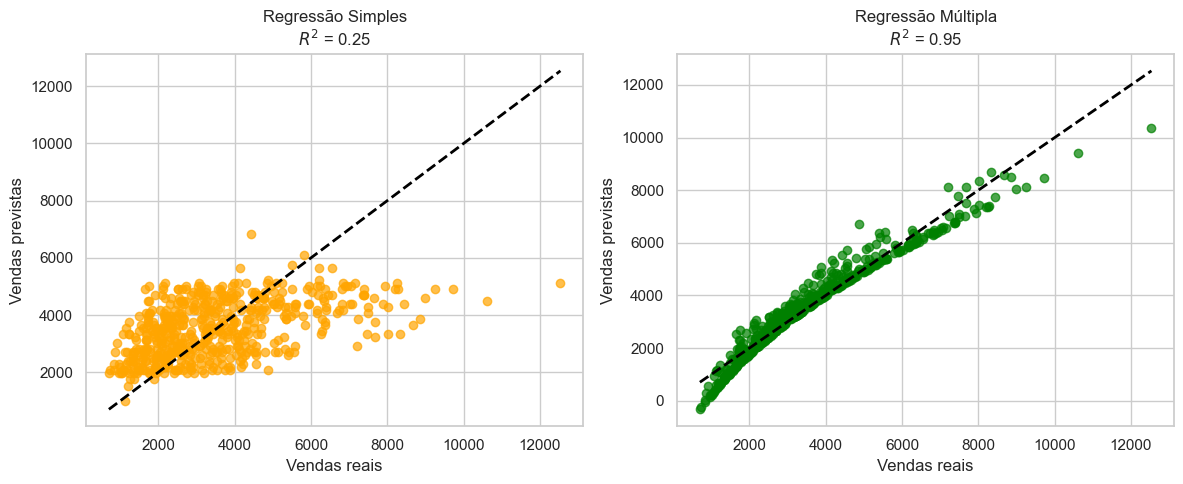

In [41]:
r2_simple = r2_score(y_test_s, y_pred_s)
r2_multi = r2_score(y_test_m, y_pred_m)

print(f"R² Regressão Simples: {r2_simple:.4f} ")
print(f"R² Regressão Múltipla: {r2_multi:.4f} ")

plt.figure(figsize=(12, 5))

# Gráfico: Regressão Simples
plt.subplot(1, 2, 1)
plt.scatter(y_test_s, y_pred_s, alpha=0.7, color='orange')
plt.plot([y_test_s.min(), y_test_s.max()], [y_test_s.min(), y_test_s.max()], 'k--', lw=2)
plt.xlabel("Vendas reais")
plt.ylabel("Vendas previstas")
plt.title(f"Regressão Simples\n$R^2$ = {r2_simple:.2f}")
plt.grid(True)

# Gráfico: Regressão Múltipla
plt.subplot(1, 2, 2)
plt.scatter(y_test_m, y_pred_m, alpha=0.7, color='green')
plt.plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()], 'k--', lw=2)
plt.xlabel("Vendas reais")
plt.ylabel("Vendas previstas")
plt.title(f"Regressão Múltipla\n$R^2$ = {r2_multi:.2f}")
plt.grid(True)

plt.tight_layout()
plt.show()


##### **Considerações Importantes:**
O R² indica o percentual de dados que podem ser explicados através da previsão, na regressão linear simples obtemos 25% indicando que esse modelo de previsão é imprevisto. Visto que utilizamos apenas a variável de quantityOrder para determinar as vendas, sem considerar que cada produto possui um valor específico e isso pode impactar o resultado final.
No modelo de regressão linear múltipla, consideramos a variável priceEach e podemos observar uma diferença significativa na qualidade da previsão, nesse modelo a porcentagem de 95% traz uma visualização mais real das vendas previstas.

###  **5. Conclusões e Considerações**